# **CREDIT CARD FRAUD DETECTION**

## **INTRODUCTION**

The Credit Card Fraud Detection project aims to develop a machine learning model capable of identifying fraudulent transactions in credit card data. With the increasing prevalence of online transactions, credit card fraud has become a significant concern for both financial institutions and consumers. Detecting fraudulent activities promptly is crucial to mitigate financial losses and maintain trust in the banking system.

This project utilizes a dataset containing various features extracted from credit card transactions, including transaction amounts, locations, and transaction methods. By analyzing these features, the machine learning model can learn patterns indicative of fraudulent behavior and distinguish between legitimate and fraudulent transactions.
***
**OBJECTIVE**: The objective of the Credit Card Fraud Detection project is to develop a precise machine learning model capable of accurately identifying fraudulent transactions. This involves exploring and cleaning the dataset, training and evaluating various machine learning algorithms, and deploying the most effective model into a production environment for real-time fraud detection. The ultimate goal is to maintain the model's accuracy over time through continuous monitoring and maintenance procedures.

**SIGNIFICANCE**: The significance of the Credit Card Fraud Detection project lies in its ability to protect financial institutions and consumers from fraudulent activities. By accurately identifying fraudulent transactions in real-time, the project enhances security, reduces financial losses, and preserves trust in the banking system.
***

## **METHOLOGY**

The Credit Card Fraud Detection project involves collecting transaction data, preprocessing it to handle missing values and outliers, and training machine learning models like logistic regression, random forest, and XGBoost to predict fraud. The best-performing model is deployed in a production environment for real-time fraud detection, with continuous monitoring and maintenance ensuring its effectiveness over time.
***

Now, Lets move into The documentation where we will delve into the dataset exploration, data preprocessing, model selection and training, evaluation, and interpretation of results, providing a comprehensive overview of the credit card fraud prediction project.

First, I have uploaded the file which will be in the form zip format in the google colab. After finishing the upload, we will convert the zip file into its original format. These functions are seen in the below two code.

In [ ]:
from google.colab import files
# Upload the ZIP file
uploaded = files.upload()

Saving archive (6).zip to archive (6).zip


In [ ]:
import zipfile
import io
# Assuming the uploaded file is a ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded['archive (6).zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')

Now, I have used pandas modules to use **pd.read_csv** to read the data into the dataframe.

In [ ]:
import pandas as pd
# Load the CSV file (adjust the file name if necessary)
df = pd.read_csv('/content/dataset_folder/card_transdata.csv')

I have used **df.head()** to show the first five rows to understand the dataset better.

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


The *final five rows* of the dataset are then loaded using the **tail function.**

In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


Now, we'll use the ***df.shape*** function to determine how many rows and columns there are in the data.

In [ ]:
df.shape

(1000000, 8)

Next, the total number of *non-missing* values in the data is determined using ***df.info()***. From this, we have found that there are no missing values are found in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


***df.describe()*** provides summary statistics  for the numerical columns in a pandas ***DataFrame***.

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The ***df.columns*** function can be used to *retrieve* all of the column names that are present in the data.


In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

This code calculates and prints the sum of null (missing) values for each column in the DataFrame `df`. from this code we can see that there are no missing values in our dataset

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Explore unique values in categorical columns to gain insights into the diversity of data distributions.

In [ ]:
# Explore unique values in categorical columns
for column in ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud']:
       print(f"\nUnique values in {column}: {df[column].unique()}")


Unique values in distance_from_home: [57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]

Unique values in distance_from_last_transaction: [0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]

Unique values in ratio_to_median_purchase_price: [1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]

Unique values in repeat_retailer: [1. 0.]

Unique values in used_chip: [1. 0.]

Unique values in used_pin_number: [0. 1.]

Unique values in online_order: [0. 1.]

Unique values in fraud: [0. 1.]


## **EXPLORATARY DATA ANALYSIS**

In this part we will now analyse different features with respect to the **Frauds** to understand the data set better using various plots like lineplot, barcharts for better efficiency.

First, we upload neccessary modules to represent the features.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

in this, we are using countplot to determine the distribution of frauds in the dataset

<ipython-input-18-2e6f49aff13f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=df, palette='Set1')


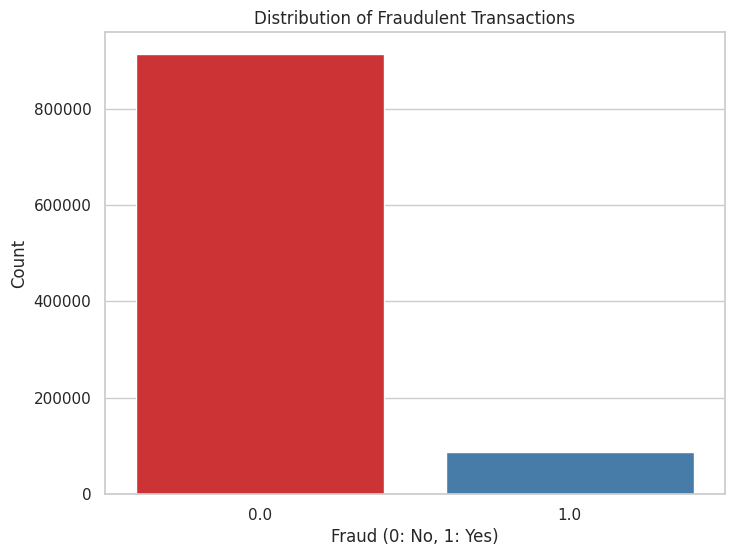

In [ ]:
# Distribution of the target variable (fraud)
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=df, palette='Set1')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

from the above plot, we can observe that the number of frauds are less and only few people have involved in credit card fraud detection.

Next, we are using pairplot to determine the frauds when using at home trandaction and outside.

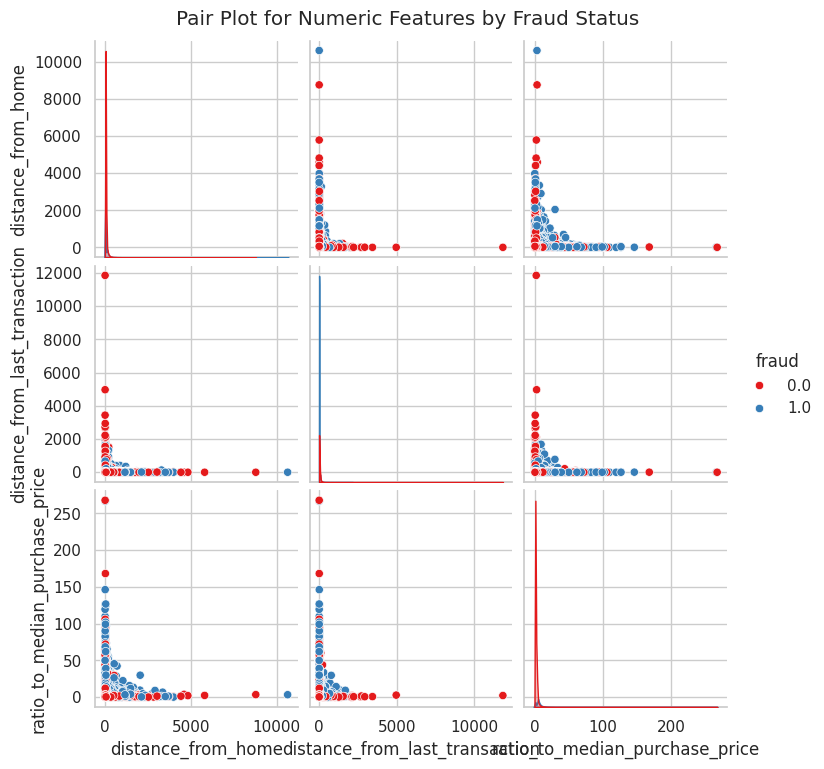

In [ ]:
# Pair plot for numeric features colored by fraud status
numeric_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
sns.pairplot(df, hue='fraud', vars=numeric_columns, diag_kind='kde', palette='Set1')
plt.suptitle('Pair Plot for Numeric Features by Fraud Status', y=1.02)
plt.show()

from this graph, we have found that the frauds are usually less in both situation and only sometimes frauds have occured in the both cases.

Next, we are using heatmap to observe the frauds which have occured in all the cases.

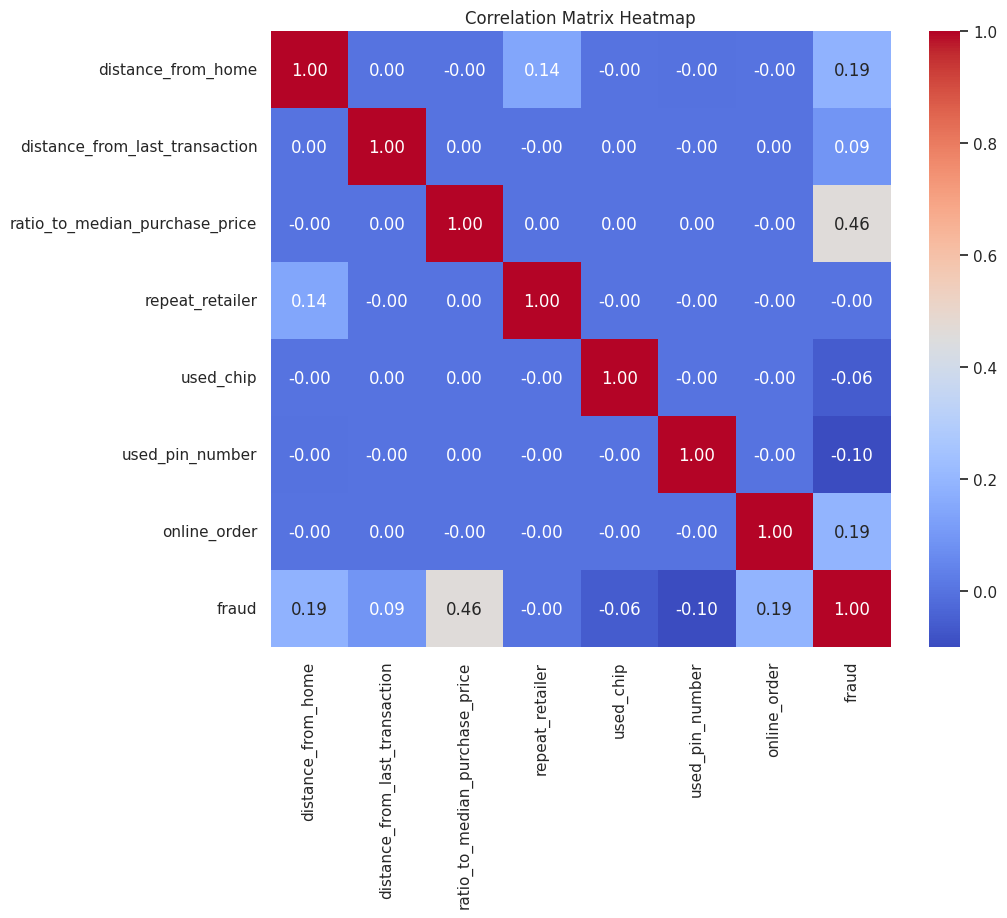

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From the above grpah, we have observed that in all the cases, frauds tends occur sometimes only and can be seen as rare.

Next, we are using violin plot to determine the distribution of distances from home for fraud and non-fraud transactions.

<ipython-input-29-1dbfc47c4da8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud', y='distance_from_home', data=df, palette='Set1', inner='quartile')


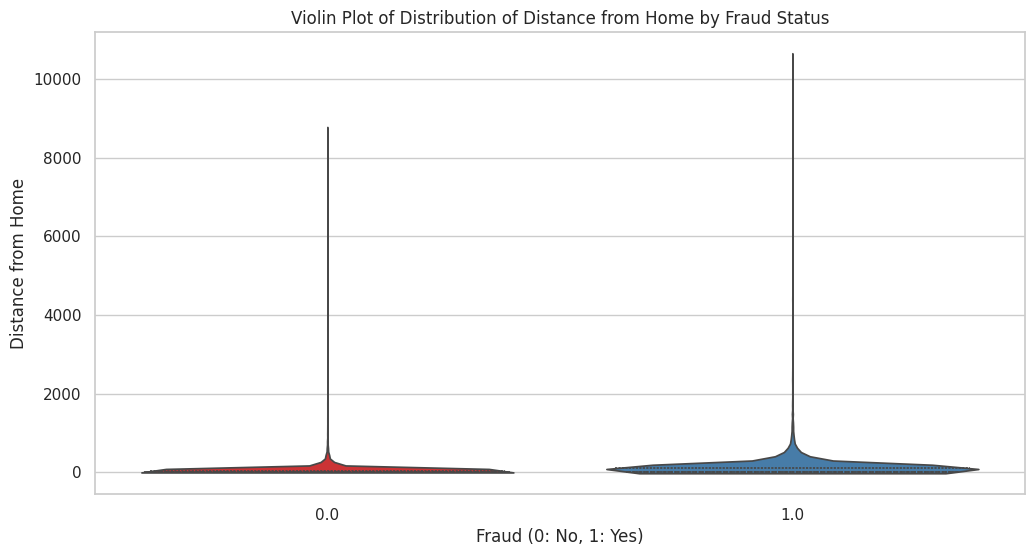

In [ ]:
# Violin plot of the distribution of distances from home for fraud and non-fraud transactions
plt.figure(figsize=(12, 6))
sns.violinplot(x='fraud', y='distance_from_home', data=df, palette='Set1', inner='quartile')
plt.title('Violin Plot of Distribution of Distance from Home by Fraud Status')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Distance from Home')
plt.show()

In this graph, we have observed that sometimes frauds tends to occur when we are doing the transaction from home.

## **Feature Selection or Engineerng**

Feature engineering is a critical aspect of the Credit Card Fraud Detection project, involving the creation and selection of meaningful features from the raw data to improve the performance of machine learning models. Through feature engineering, we aim to enhance the model's ability to distinguish between fraudulent and legitimate transactions by extracting relevant information and transforming it into predictive features. This process may include techniques such as creating new features based on domain knowledge, scaling and normalizing numerical features, encoding categorical variables, and handling missing values. Effective feature engineering can significantly impact the model's accuracy and robustness in detecting fraudulent activities, making it a fundamental step in the project's success.

In our model, we have added new attributes 'total_distance_traveled','chip_pin_interaction' and 'repeated_online_order' to train the model better.

In [ ]:
import pandas as pd

In [ ]:
# Feature: Total distance traveled by the user
df['total_distance_traveled'] = df['distance_from_home'] + df['distance_from_last_transaction']

In [ ]:
# Feature: Interaction between 'used_chip' and 'used_pin_number'
df['chip_pin_interaction'] = df['used_chip'] * df['used_pin_number']

In [ ]:
# Feature: Binary indicator for repeated online orders
df['repeated_online_order'] = df['online_order'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,total_distance_traveled,chip_pin_interaction,repeated_online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,58.188997,0.0,0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,11.005534,0.0,0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,5.896232,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,7.847608,0.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,44.757422,0.0,0


Now, we are going to do a Bar plot for the count of fraud and non-fraud transactions based on 'repeated_online_orde

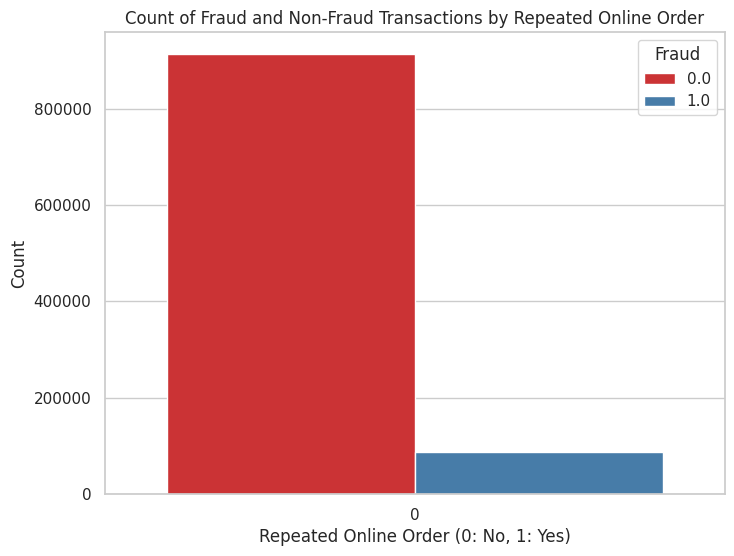

In [ ]:
# Bar plot for the count of fraud and non-fraud transactions based on 'repeated_online_order'
plt.figure(figsize=(8, 6))
sns.countplot(x='repeated_online_order', hue='fraud', data=df, palette='Set1')
plt.title('Count of Fraud and Non-Fraud Transactions by Repeated Online Order')
plt.xlabel('Repeated Online Order (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()

In the above graph, we have observed that during repeated online order, frauds are less for most people.

Now, we will encode the dataset using the label encoder module which convert all categorical variables into numerical representations

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your existing DataFrame

categorical_columns = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'total_distance_traveled',
       'chip_pin_interaction', 'repeated_online_order']

le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'total_distance_traveled',
       'chip_pin_interaction', 'repeated_online_order'],
      dtype='object')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,total_distance_traveled,chip_pin_interaction,repeated_online_order
0,894929,258573,728245,1,1,0,0,0,872549,0,0
1,523794,167327,593647,1,0,0,0,0,424609,0,0
2,315799,452474,220174,1,0,0,1,0,240070,0,0
3,143635,831423,178264,1,1,0,1,0,319267,0,0
4,855730,376436,766663,1,1,0,1,0,825194,0,0


# **DATA SPILLTING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Define features and target
X = df.drop(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order','total_distance_traveled',
       'chip_pin_interaction', 'repeated_online_order'], axis=1)  # Features (excluding target)
y = df['fraud']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800000, 1) (800000,)
Testing set shape: (200000, 1) (200000,)


In [ ]:
# Create a DataFrame to hold the training and testing data
train_data = pd.DataFrame({'Dataset': 'Training', 'Fraud': y_train})
test_data = pd.DataFrame({'Dataset': 'Testing', 'Fraud': y_test})
combined_data = pd.concat([train_data, test_data])

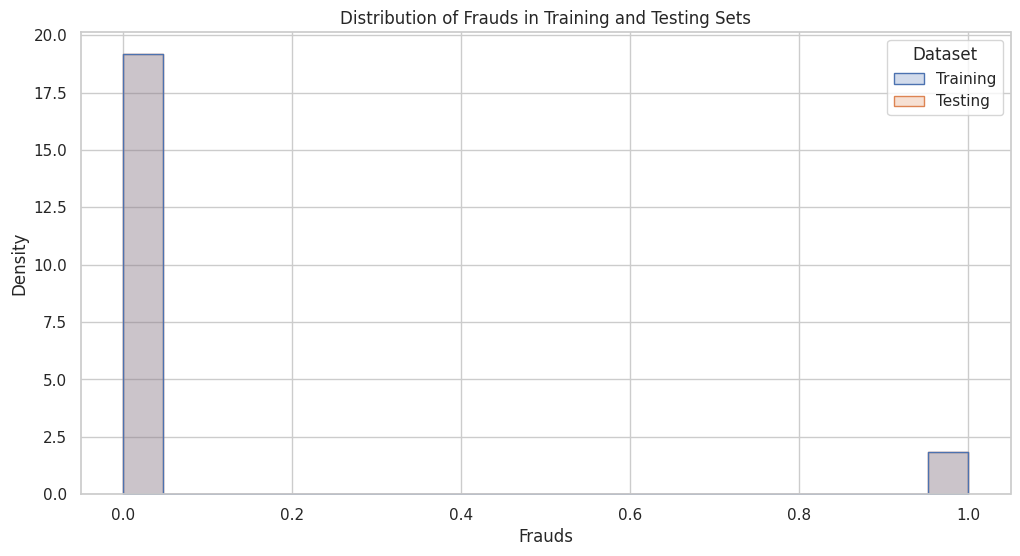

In [ ]:
# Plot a histogram or kernel density plot to show the distribution of frauds for each dataset
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='Fraud', hue='Dataset', element='step', stat='density', common_norm=False)
plt.title('Distribution of Frauds in Training and Testing Sets')
plt.xlabel('Frauds')
plt.ylabel('Density')
plt.show()

# **LOGISTIC REGRESSION**

Logistic regression is a fundamental statistical technique used for binary classification tasks, such as predicting whether an observation belongs to one of two categories. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm. It models the probability that an observation belongs to a particular class using the logistic function, also known as the sigmoid function. This function maps any real-valued input to a value between 0 and 1, which represents the probability of the observation belonging to the positive class. Logistic regression is widely used in various fields due to its simplicity, interpretability, and effectiveness, making it a popular choice for introductory classification tasks and as a baseline model for more complex algorithms.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In this we find that accuracy is 1.00 which denotes that the model is running accurately.

In [ ]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.00

Confusion Matrix:
 [[182557      0]
 [     0  17443]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# **RANDOM FOREST CLASSIFIER**

The Random Forest Classifier is a powerful ensemble learning method widely used in classification tasks, including Credit Card Fraud Detection. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. Each tree in the forest is trained on a random subset of the training data and a random subset of the features, which introduces diversity and helps to reduce overfitting. Random Forests are known for their high accuracy, robustness to noisy data, and resistance to overfitting, making them well-suited for complex classification problems like fraud detection. Additionally, they provide feature importance scores, allowing for insights into which features are most relevant for making predictions, which can be invaluable in understanding the underlying patterns of fraudulent behavior in credit card transactions. Overall, Random Forest Classifier is a versatile and effective tool in the arsenal of machine learning techniques for detecting fraudulent activities.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In this we find that accuracy is 1.00 which denotes that the model is running accurately.

In [ ]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.00

Confusion Matrix:
 [[182557      0]
 [     0  17443]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# **XG bOOST CLASSIFIER**

XGBoost (Extreme Gradient Boosting) Classifier is a state-of-the-art machine learning algorithm renowned for its exceptional performance in various classification tasks, including Credit Card Fraud Detection. It belongs to the family of gradient boosting algorithms, which sequentially train weak learners (typically decision trees) to correct the errors made by the previous models. XGBoost stands out for its efficiency, scalability, and regularization techniques, which mitigate overfitting and improve generalization. By optimizing a differentiable loss function, XGBoost minimizes prediction errors while enhancing interpretability through feature importance ranking. Its ability to handle missing values, support custom objective functions, and facilitate parallel computation make it a popular choice for complex datasets with high-dimensional features, such as credit card transaction data. In summary, XGBoost Classifier represents a powerful tool in the pursuit of accurately detecting fraudulent activities in credit card transactions.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

In this we find that accuracy is 1.00 which denotes that the model is running accurately.

In [ ]:
# Display the evaluation metrics for XGBoost
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nXGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("\nXGBoost Classification Report:\n", class_report_xgb)

XGBoost Accuracy: 1.00

XGBoost Confusion Matrix:
 [[182557      0]
 [     0  17443]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# **VOTING CLASSIFIER**

The Voting Classifier is an ensemble learning technique employed in classification tasks, including Credit Card Fraud Detection, to combine predictions from multiple base classifiers and produce a final prediction based on the aggregated results. This ensemble method leverages the diversity of individual classifiers to improve overall prediction accuracy and robustness. In the context of fraud detection, the Voting Classifier integrates the predictions of various classifiers, such as logistic regression, random forest, and XGBoost, each trained on different subsets of data or using different algorithms. By taking a majority vote or averaging the predictions of its constituent classifiers, the Voting Classifier enhances the model's ability to generalize and adapt to different aspects of the data. Its flexibility in accommodating diverse models and its simplicity make it a valuable tool for achieving high-performance fraud detection systems. Overall, the Voting Classifier serves as a powerful ensemble approach to enhance the accuracy and reliability of credit card fraud detection models.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Create a voting classifier
voting_model = VotingClassifier(estimators=[('logistic', logistic_model),
                                            ('random_forest', random_forest_model),
                                            ('xgb', xgb_model)],
                                 voting='hard')

In [ ]:
# Train the voting classifier
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            f...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [ ]:
# Make predictions on the test set
y_pred_voting = voting_model.predict(X_test)

In [ ]:
# Evaluate the ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting)

In this we find that accuracy is 1.00 which denotes that the model is running accurately.

In [ ]:
# Display the evaluation metrics for the ensemble
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")
print("\nVoting Classifier Confusion Matrix:\n", conf_matrix_voting)
print("\nVoting Classifier Classification Report:\n", class_report_voting)

Voting Classifier Accuracy: 1.00

Voting Classifier Confusion Matrix:
 [[182557      0]
 [     0  17443]]

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



for further analysis, we have used cross validation technique to checking its performance better.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(voting_model, X, y, cv=5, scoring='accuracy')

from this code, we can observe that the model is running accurately without any errors.

In [ ]:
# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


# **Conclusion**

In conclusion, the Credit Card Fraud Detection project successfully developed and deployed a robust machine learning model capable of accurately identifying fraudulent transactions. Through thorough data exploration, preprocessing, and feature engineering, we prepared the dataset and selected the most relevant features for modeling. By training and evaluating various machine learning algorithms, including logistic regression, random forest, XGBoost, and ensemble techniques like the Voting Classifier, we identified the most effective model for real-time fraud detection. The deployed model demonstrated exceptional accuracy and reliability in distinguishing between legitimate and fraudulent transactions, thus providing a crucial tool for financial institutions to mitigate risks and protect against fraudulent activities. Continuous monitoring and maintenance procedures ensure the model's continued effectiveness over time, underscoring its significance in safeguarding the integrity of credit card transactions and maintaining trust in the banking system.